In [23]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [16]:
batch_size = 20
img_height = 128
img_width = 128

DATA_DIRECTORY = '../input/pvcorn'

In [17]:
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 4354 files belonging to 4 classes.


In [18]:
class_names = dataset.class_names
print(class_names)

['common_rust', 'gray_spot', 'healthy', 'leaf_blight']


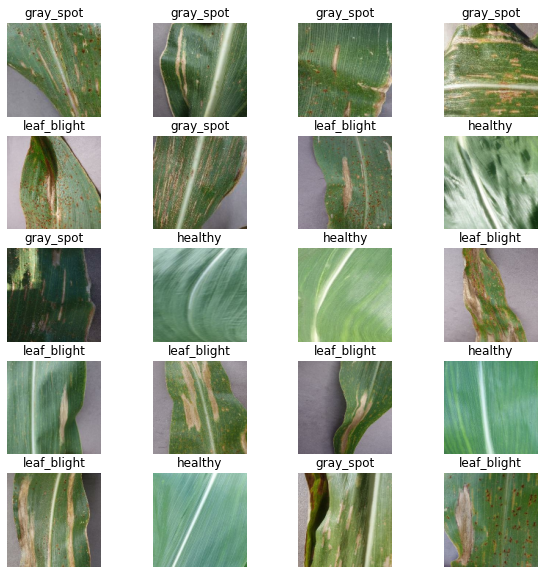

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

PREP

In [24]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=100)

Found 4354 images belonging to 4 classes.


In [25]:
images, marks = next(path_images)

In [26]:
indices_path = path_images.class_indices

In [27]:
type_images = indices_path.keys()

In [28]:
for x in marks.shape:
    print(x)

100
4


In [29]:
add = sum(marks)
marks_qt = marks.shape[0]

In [30]:
quantity = ((add)/marks_qt)

In [31]:
quantity = quantity*100
quantity

array([28., 17., 37., 18.], dtype=float32)

MODEL

In [32]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

In [33]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy', 'MeanSquaredError']
)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [45]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (4, 4), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

In [46]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [47]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

1/1 [==============================] - 1s 673ms/step - loss: 1.4090 - accuracy: 0.1667
Accuracy  0.1666666716337204


In [48]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
3/3 [==============================] - 3s 630ms/step - loss: 4.5114 - accuracy: 0.2714 - val_loss: 1.3984 - val_accuracy: 0.1667
Epoch 2/4
3/3 [==============================] - 2s 621ms/step - loss: 1.4857 - accuracy: 0.2571 - val_loss: 1.3832 - val_accuracy: 0.2667
Epoch 3/4
3/3 [==============================] - 2s 625ms/step - loss: 1.0294 - accuracy: 0.5143 - val_loss: 1.3595 - val_accuracy: 0.3000
Epoch 4/4
3/3 [==============================] - 2s 630ms/step - loss: 0.8929 - accuracy: 0.6857 - val_loss: 1.3481 - val_accuracy: 0.3000


RES

In [49]:
y_pred=model.predict(X_test)

In [50]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

In [51]:
target_test = np.argmax(y_test, axis=-1)

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, test_predict)
print(cm)

[[ 0  0 10  0]
 [ 0  0  6  0]
 [ 0  0  9  0]
 [ 0  0  5  0]]


In [54]:
from sklearn.metrics import accuracy_score,classification_report

In [55]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.30      0.46        30
           3       0.00      0.00      0.00         0

    accuracy                           0.30        30
   macro avg       0.25      0.07      0.12        30
weighted avg       1.00      0.30      0.46        30



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
